In [1]:
suppressWarnings(suppressPackageStartupMessages(library(ggplot2)))
suppressWarnings(suppressPackageStartupMessages(library(cowplot)))
suppressWarnings(suppressPackageStartupMessages(library(dplyr)))
suppressWarnings(suppressPackageStartupMessages(library(arrow)))
suppressWarnings(suppressPackageStartupMessages(library(argparse)))

In [2]:
percent_cell_mAP_file_path <- file.path("../results/mAP_cell_percentages.parquet")
across_channels_mAP_file_path <- file.path("../results/mAP_across_channels.parquet")

percent_cell_mAP <- arrow::read_parquet(percent_cell_mAP_file_path)
across_channels_mAP <- arrow::read_parquet(across_channels_mAP_file_path)
dim(percent_cell_mAP)
dim(across_channels_mAP)

[1] 792396     14

[1] 12672    12

In [3]:
head(percent_cell_mAP)

Metadata_Time,Metadata_treatment,Metadata_reference_index,mean_average_precision,indices,p_value,corrected_p_value,below_p,below_corrected_p,-log10(p-value),percentage_of_cells,seed,shuffle,__index_level_0__
<chr>,<chr>,<int>,<dbl>,<list<integer>>,<dbl>,<dbl>,<lgl>,<lgl>,<dbl>,<dbl>,<int>,<lgl>,<int>
00,Ab1-42 0.4 uM,-1,0.7166667,"63, 64, 65",0.2998607,0.4712097,FALSE,FALSE,0.32678580,0.8,577882,TRUE,0
00,Ab1-42 10 uM,-1,0.7194444,"52, 54, 56",0.2998607,0.4712097,FALSE,FALSE,0.32678580,0.8,577882,TRUE,1
00,Ab1-42 2 uM,-1,0.5250000,"58, 60, 62",0.4993425,0.5492768,FALSE,FALSE,0.26020878,0.8,577882,TRUE,2
00,Flagellin 0.1 ug/ml,-1,0.3527778,"39, 41, 43",0.8997821,0.8997821,FALSE,FALSE,0.04586265,0.8,577882,TRUE,3
00,Flagellin 1 ug/ml,-1,0.5555556,"33, 35, 37",0.4993425,0.5492768,FALSE,FALSE,0.26020878,0.8,577882,TRUE,4
00,Flagellin 10 ug/ml,-1,0.9444444,"27, 29, 31",0.0998809,0.1997618,FALSE,FALSE,0.69948756,0.8,577882,TRUE,5


In [11]:
# get the average mAP for each treatment and timepoint
percent_cell_mAP <- percent_cell_mAP %>%
  group_by(Metadata_treatment, Metadata_Time, shuffle, percentage_of_cells) %>%
  summarise(mAP = mean(mean_average_precision))

`summarise()` has grouped output by 'Metadata_treatment', 'Metadata_Time',
'shuffle'. You can override using the `.groups` argument.


In [12]:
head(percent_cell_mAP)

Metadata_treatment,Metadata_Time,shuffle,percentage_of_cells,mAP
<chr>,<chr>,<lgl>,<dbl>,<dbl>
Ab1-42 0.4 uM,00,FALSE,0.1,0.7166667
Ab1-42 0.4 uM,00,FALSE,0.2,0.7166667
Ab1-42 0.4 uM,00,FALSE,0.3,0.7166667
Ab1-42 0.4 uM,00,FALSE,0.4,0.7166667
Ab1-42 0.4 uM,00,FALSE,0.5,0.7166667
Ab1-42 0.4 uM,00,FALSE,0.6,0.7166667


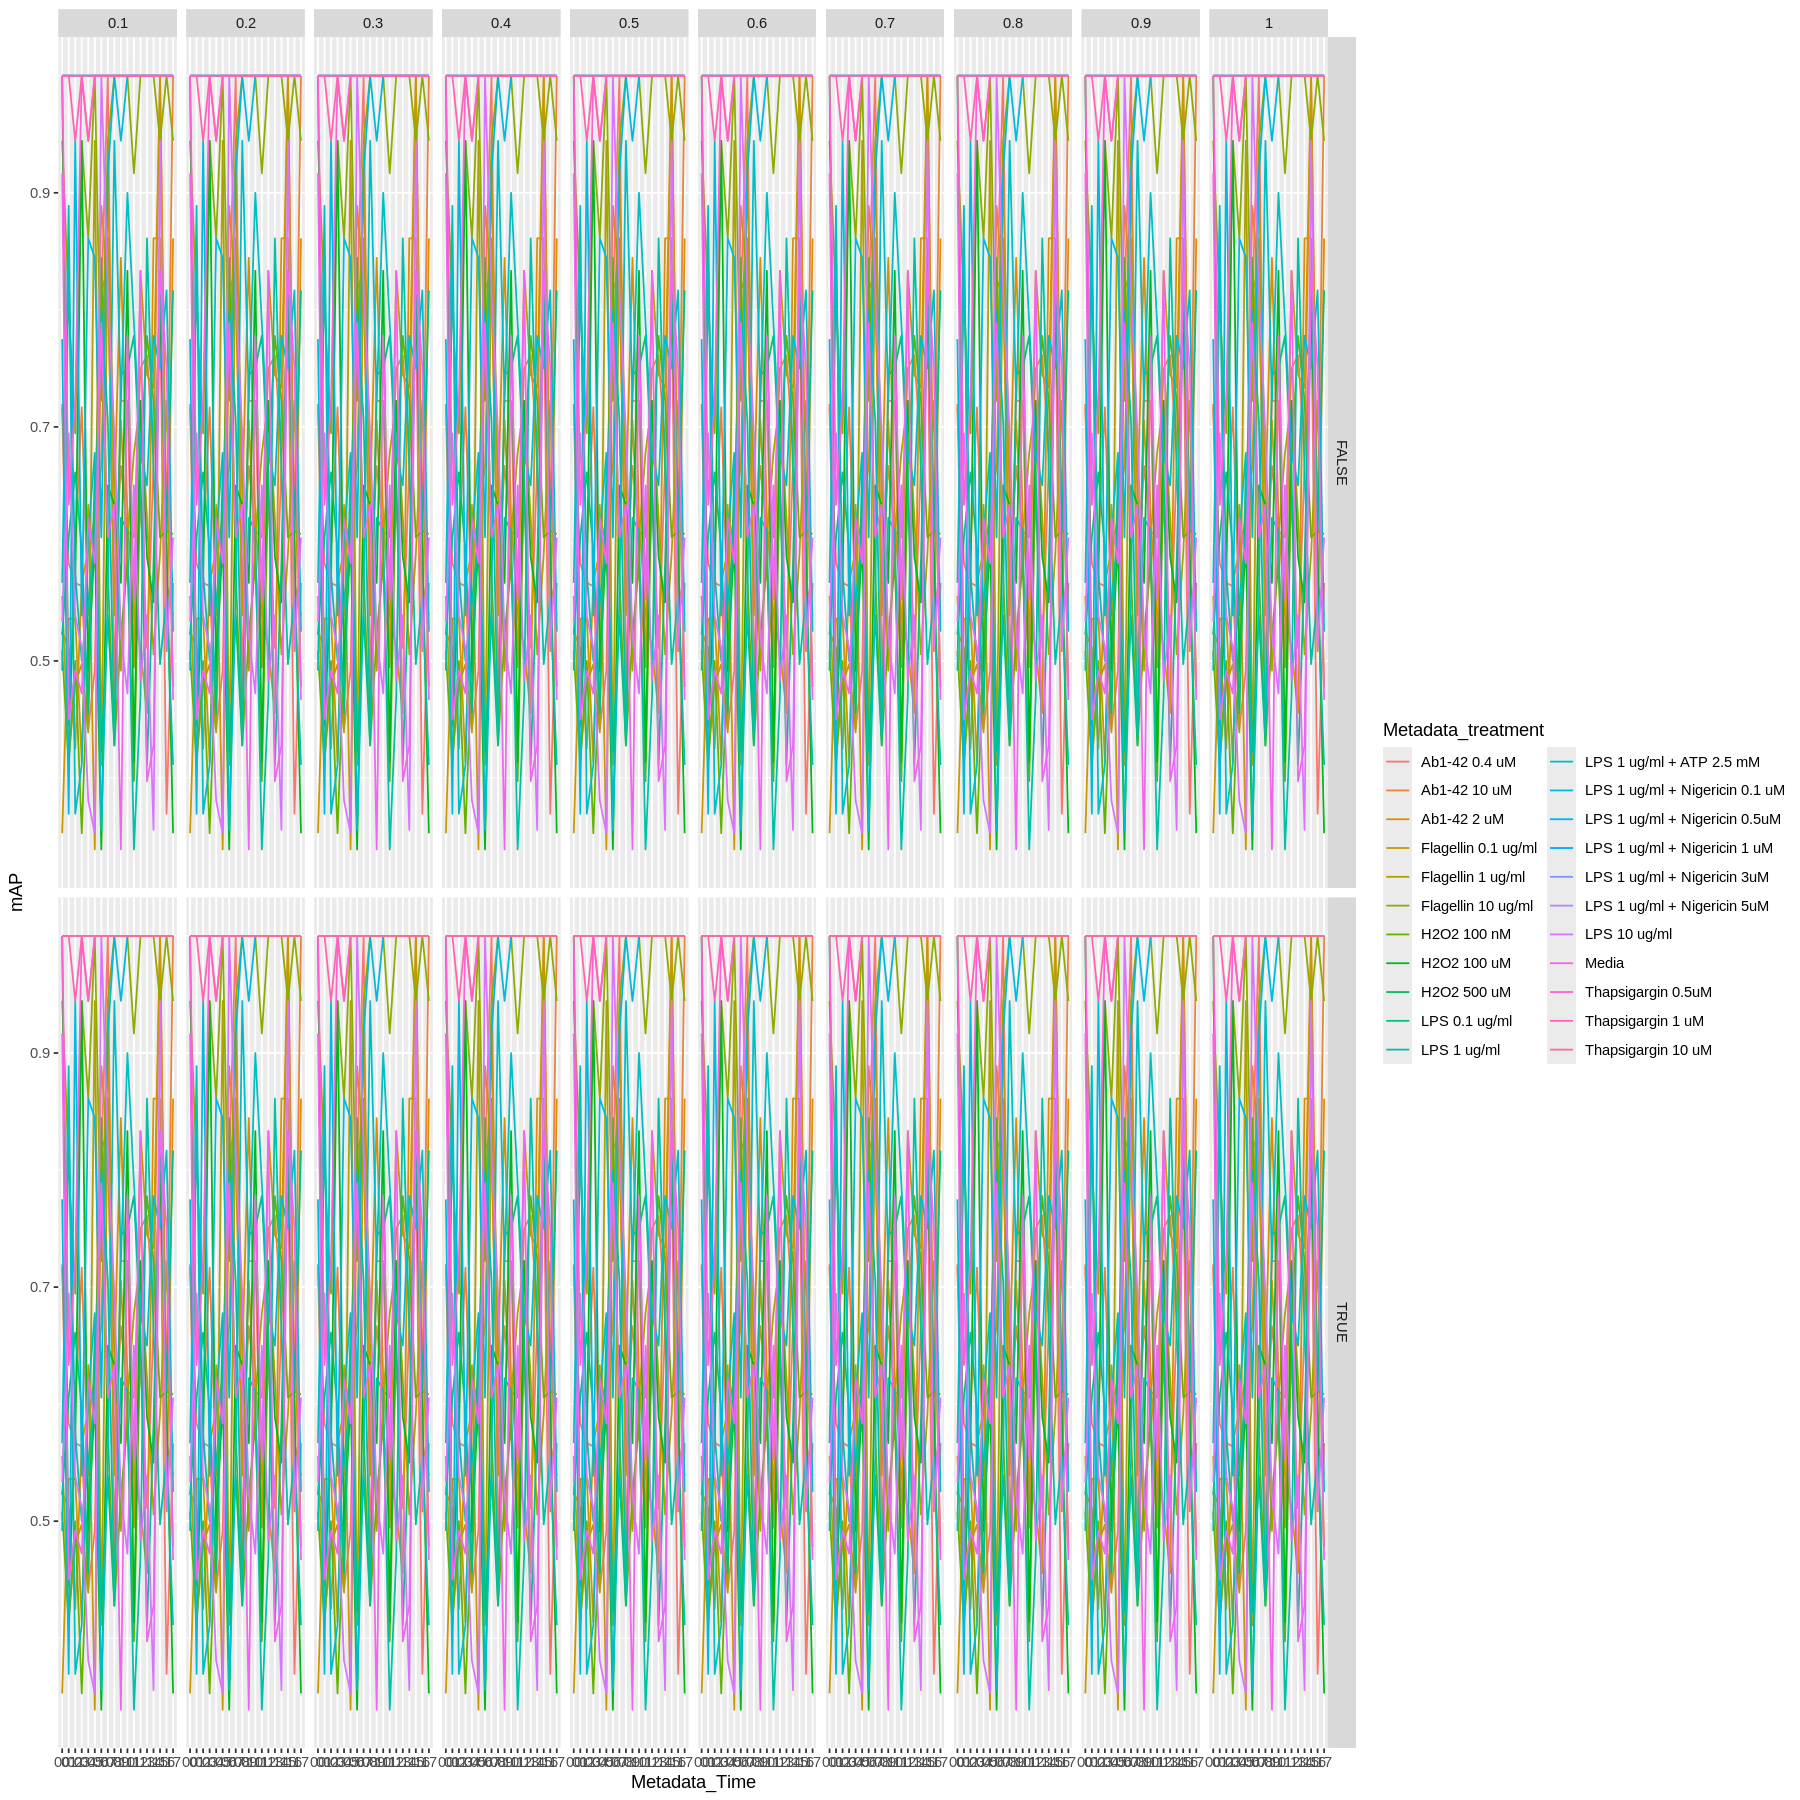

In [29]:
width <- 15
height <- 15
options(repr.plot.width = width, repr.plot.height = height)
percent_cell_plot <- (
    ggplot(data = percent_cell_mAP, aes(x = Metadata_Time, y = mAP))
    + geom_line(aes(group = Metadata_treatment, color = Metadata_treatment))
    + facet_grid(shuffle ~ percentage_of_cells)
)
percent_cell_plot